<a href="https://colab.research.google.com/github/Sathish2004/Mini-Project/blob/main/sat_mini_hlcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Packages**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from tqdm import tqdm
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading Data**

In [5]:
file = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")
file = file.dropna()
file.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## **Data Preprocessing**

In [ ]:
file.drop(['ID'], axis = 1, inplace = True)

### **Converting Values from Days to Years in "Age" Column**

In [ ]:
file["Age"] = (file["Age"] / 365)
file["Age"] = file["Age"].astype("int64")

In [ ]:
data = file.iloc[:, :len(file.columns) - 1]
labels = file.iloc[:, len(file.columns)-1]
class_names = labels.unique()

## **Data Analysis**

In [ ]:
file.describe().transpose().style.background_gradient(cmap = 'GnBu')

,count,mean,std,min,25%,50%,75%,max
N_Days,276.000000,1979.166667,1112.380295,41.000000,1185.750000,1788.000000,2689.750000,4556.000000
Age,276.000000,49.322464,10.523791,26.000000,41.000000,49.000000,56.000000,78.000000
Bilirubin,276.000000,3.333696,4.601074,0.300000,0.800000,1.400000,3.525000,28.000000
Cholesterol,276.000000,371.260870,234.788363,120.000000,249.500000,310.000000,401.000000,1775.000000
Albumin,276.000000,3.516812,0.404789,1.960000,3.310000,3.545000,3.772500,4.400000
Copper,276.000000,100.768116,88.268746,4.000000,42.750000,74.000000,129.250000,588.000000
Alk_Phos,276.000000,1996.611594,2115.477894,289.000000,922.500000,1277.500000,2068.250000,13862.400000
SGOT,276.000000,124.119239,56.719952,28.380000,82.457500,116.625000,153.450000,457.250000
Tryglicerides,276.000000,124.978261,65.280761,33.000000,85.000000,108.000000,151.250000,598.000000
Platelets,276.000000,261.771739,93.128857,62.000000,200.000000,257.000000,318.250000,563.000000


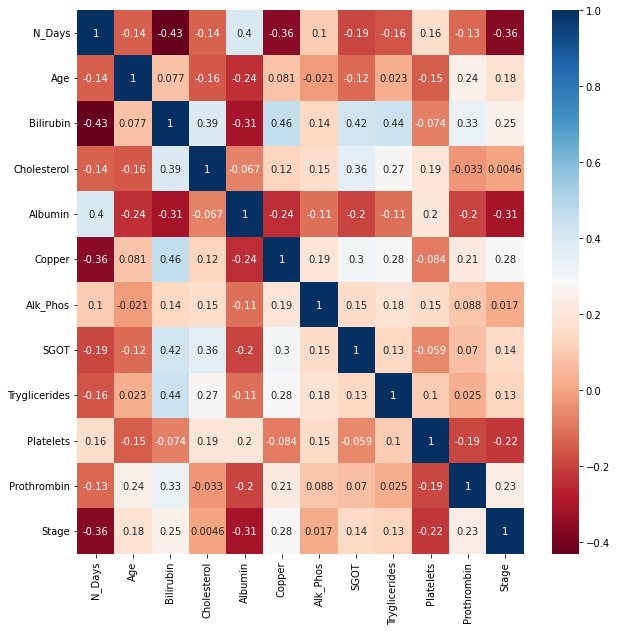

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(file.corr(), cmap="RdBu", annot=True)
plt.show()

## **Splitting Dataset**

In [ ]:
data = pd.get_dummies(data)

## **Feature Selection**

In [ ]:
best = SelectKBest( score_func = chi2, k = 6)
fit = best.fit(data, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, shuffle = True)

In [ ]:
print(f"Shape of Train Images : {np.shape(x_train)}")
print(f"Shape of Test Images : {np.shape(x_test)}")
print(f"Shape of Train Labels : {np.shape(y_train)}")
print(f"Shape of Test Labels : {np.shape(y_test)}")

Shape of Train Images : (207, 27)
Shape of Test Images : (69, 27)
Shape of Train Labels : (207,)
Shape of Test Labels : (69,)


## **Models & Evaluation**

### **Logistic Regression**

Classification Report of Logistic Regression : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.50      0.12      0.20        16
         3.0       0.51      0.76      0.61        25
         4.0       0.67      0.72      0.69        25

    accuracy                           0.57        69
   macro avg       0.42      0.40      0.38        69
weighted avg       0.54      0.57      0.52        69

Confusion Matrix of Logistic Regression: 



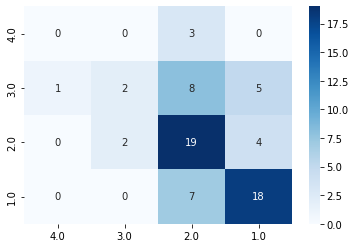

In [ ]:
lor_model = LogisticRegression(random_state=1, max_iter=1000)
lor_model.fit(x_train, y_train)

lor_pred = lor_model.predict(x_test)
lor_cm = confusion_matrix(y_test, lor_pred)

print(f"Classification Report of Logistic Regression : \n {classification_report(y_test, lor_pred)}")

print(f"Confusion Matrix of Logistic Regression: \n")
sns.heatmap(lor_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)
plt.show()

### **KNN**

Classification Report of KNN : 
               precision    recall  f1-score   support

         1.0       0.12      0.33      0.18         3
         2.0       0.38      0.38      0.38        16
         3.0       0.50      0.56      0.53        25
         4.0       0.65      0.44      0.52        25

    accuracy                           0.46        69
   macro avg       0.41      0.43      0.40        69
weighted avg       0.51      0.46      0.48        69

Confusion Matrix of KNN : 



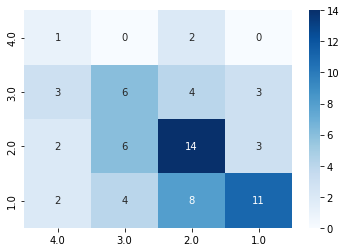

In [ ]:
knn_model = KNeighborsClassifier( n_neighbors=3 )
knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_pred)

print(f"Classification Report of KNN : \n {classification_report(y_test, knn_pred)}")

print(f"Confusion Matrix of KNN : \n")
sns.heatmap(knn_cm, cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)
plt.show()

### **Random Forest**

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.33      0.12      0.18        16
         3.0       0.39      0.44      0.42        25
         4.0       0.57      0.80      0.67        25

    accuracy                           0.48        69
   macro avg       0.32      0.34      0.32        69
weighted avg       0.43      0.48      0.43        69

Confusion Matrix of Random Forest Classifier : 



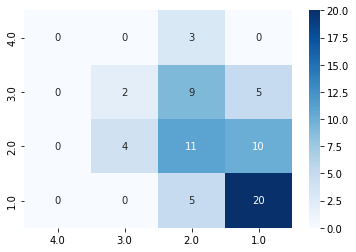

In [ ]:
rf_model = RandomForestClassifier( n_estimators = 200, random_state = 0,max_depth = 12)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)
rf_cm = confusion_matrix(y_test, rf_pred)

print(f"Classification Report of Random Forest Classifier : \n {classification_report(y_test, rf_pred)}")

print(f"Confusion Matrix of Random Forest Classifier : \n")
sns.heatmap(rf_cm, cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)
plt.show()

### **SVM**

Classification Report of SVM : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        16
         3.0       0.43      0.96      0.59        25
         4.0       0.69      0.36      0.47        25

    accuracy                           0.48        69
   macro avg       0.28      0.33      0.27        69
weighted avg       0.41      0.48      0.39        69

Confusion Matrix of SVM : 



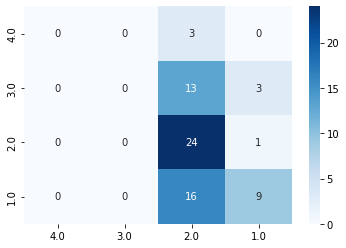

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)
svm_cm = confusion_matrix(y_test, svm_pred)

print(f"Classification Report of SVM : \n {classification_report(y_test, svm_pred)}")

print(f"Confusion Matrix of SVM : \n")
sns.heatmap(svm_cm, cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)
plt.show()